In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [6]:
movie = pd.read_csv(r'C:\Users\DELL\udemy recommendation system\2..Movie-lens\Datasets/movie.csv')


In [8]:
ratings = pd.read_csv(r'C:\Users\DELL\udemy recommendation system\2..Movie-lens\Datasets/rating.csv', usecols=['userId', 'movieId', 'rating'])

In [9]:
movie.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [10]:
ratings.head(2)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5


In [12]:
ratings.shape

(20000263, 3)

In [14]:
rating_df = ratings[0:100000]

In [15]:
rating_df.shape

(100000, 3)

In [16]:
movie.shape

(27278, 3)

In [17]:
df2 = pd.merge(rating_df, movie, on='movieId')

In [18]:
df2.shape

(100000, 5)

In [19]:
df2.head(2)

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy


In [24]:
movies_rating_cout = df2.groupby('title')['rating'].count().reset_index().rename(columns={'rating':'TotalRatingCount'})

In [25]:
movies_rating_cout

,title,TotalRatingCount
0,'Hellboy': The Seeds of Creation (2004),1
1,'Neath the Arizona Skies (1934),1
2,'Round Midnight (1986),1
3,'Til There Was You (1997),3
4,"'burbs, The (1989)",14
...,...,...
8220,"\\""Great Performances\""\"" Cats (1998)""",1
8221,eXistenZ (1999),35
8222,xXx (2002),22
8223,xXx: State of the Union (2005),4


In [26]:
final_df = df2.merge(movies_rating_cout, on='title', how='left')

In [27]:
final_df.head(2)

,userId,movieId,rating,title,genres,TotalRatingCount
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,112
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112


In [28]:
final_df.shape

(100000, 6)

In [34]:
final_df.to_csv(r'C:\Users\DELL\udemy recommendation system\2..Movie-lens\Datasets/cleaned_data.csv', index=False)

## Creating a pivot table to understand th data 

or we could use the quantile concept since it's straight to the point
and we can easily declare the percentile we need 

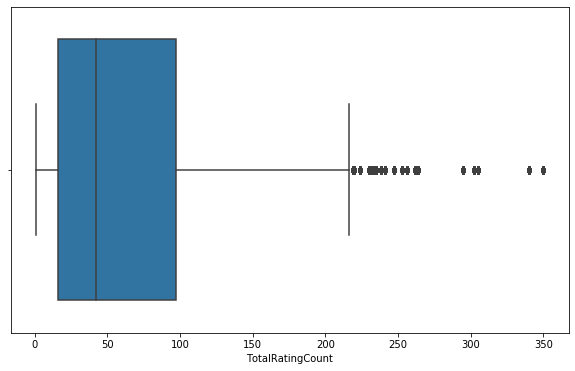

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(final_df['TotalRatingCount'])

In [40]:
final_df['TotalRatingCount'].quantile(0.1)

5.0

the quantile value shows use the  percentile present in our data, from the above quantile value (0.1(10%)) we can see
that we got a 5.0 which shows that there are 10% values within 0n and 5.0 

In [43]:
for i in range(0,101,10):
    print('the quantile at '+str(i)+ ' percentile is '+str(final_df['TotalRatingCount'].quantile(i/100)))

the quantile at 0 percentile is 1.0
the quantile at 10 percentile is 5.0
the quantile at 20 percentile is 11.0
the quantile at 30 percentile is 20.0
the quantile at 40 percentile is 29.0
the quantile at 50 percentile is 42.0
the quantile at 60 percentile is 61.0
the quantile at 70 percentile is 80.0
the quantile at 80 percentile is 112.0
the quantile at 90 percentile is 164.0
the quantile at 100 percentile is 350.0


## Building a pivot table

In [45]:
#adding the threshold using the filter method
final_df[final_df['TotalRatingCount']>61]

,userId,movieId,rating,title,genres,TotalRatingCount
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,112
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
...,...,...,...,...,...,...
81426,637,5989,3.5,Catch Me If You Can (2002),Crime|Drama,73
81427,648,5989,4.0,Catch Me If You Can (2002),Crime|Drama,73
81428,650,5989,2.0,Catch Me If You Can (2002),Crime|Drama,73
81429,662,5989,3.5,Catch Me If You Can (2002),Crime|Drama,73


In [49]:
#adding the threshold using the query method
thresh = 61
rating_popular_movie = final_df.query('TotalRatingCount > @thresh')
rating_popular_movie

,userId,movieId,rating,title,genres,TotalRatingCount
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,112
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
...,...,...,...,...,...,...
81426,637,5989,3.5,Catch Me If You Can (2002),Crime|Drama,73
81427,648,5989,4.0,Catch Me If You Can (2002),Crime|Drama,73
81428,650,5989,2.0,Catch Me If You Can (2002),Crime|Drama,73
81429,662,5989,3.5,Catch Me If You Can (2002),Crime|Drama,73


In [50]:
rating_popular_movie.columns

Index(['userId', 'movieId', 'rating', 'title', 'genres', 'TotalRatingCount'], dtype='object')

In [52]:
movie_mat = rating_popular_movie.pivot_table(index='userId', columns='title', values= 'rating')

In [53]:
movie_mat

title,12 Angry Men (1957),2001: A Space Odyssey (1968),A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),Air Force One (1997),Airplane! (1980),Aladdin (1992),...,What's Eating Gilbert Grape (1993),When Harry Met Sally... (1989),While You Were Sleeping (1995),Who Framed Roger Rabbit? (1988),Wild Wild West (1999),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)",X-Men (2000),X2: X-Men United (2003),Young Frankenstein (1974)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,NaN,NaN,3.5,NaN,4.0,4.0
2,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,5.0,NaN,...,3.0,4.0,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,4.0,NaN,NaN,4.0,3.0,NaN,3.0,NaN,4.0,NaN,...,NaN,5.0,3.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN
700,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,0.5


In [55]:
movie_mat['Airplane! (1980)']

userId
1      NaN
2      2.0
3      5.0
4      NaN
5      NaN
      ... 
698    NaN
699    4.0
700    NaN
701    NaN
702    NaN
Name: Airplane! (1980), Length: 697, dtype: float64

## finding the co-relating value and automating recommendation 

In [57]:
#Compute pairwise correlation between rows or columns of DataFrame
#with rows or columns of Series or DataFrame.
similarity = movie_mat.corrwith(movie_mat['Airplane! (1980)'])

In [58]:
similarity

title
12 Angry Men (1957)                           0.124450
2001: A Space Odyssey (1968)                  0.257047
A.I. Artificial Intelligence (2001)           0.179316
Abyss, The (1989)                             0.189847
Ace Ventura: Pet Detective (1994)             0.320546
                                                ...   
Willy Wonka & the Chocolate Factory (1971)    0.367150
Wizard of Oz, The (1939)                      0.416640
X-Men (2000)                                  0.016163
X2: X-Men United (2003)                       0.153777
Young Frankenstein (1974)                     0.468760
Length: 357, dtype: float64

In [60]:
similarity.sort_values(ascending=False)[0:10]

title
Airplane! (1980)                          1.000000
Casper (1995)                             0.680396
Galaxy Quest (1999)                       0.661684
Bridge on the River Kwai, The (1957)      0.629462
Santa Clause, The (1994)                  0.603553
Unforgiven (1992)                         0.602800
Tomorrow Never Dies (1997)                0.602446
Monty Python and the Holy Grail (1975)    0.601236
Terminator, The (1984)                    0.580656
Coneheads (1993)                          0.556090
dtype: float64

In [86]:
#lets convert the recommendating into a dataframe so we can make recommendations by showing movies totall ratings 
# and average rating 

co_Reln = similarity.sort_values(ascending=False).reset_index().rename(columns={0:'co_relation'})

In [87]:
co_Reln

,title,co_relation
0,Airplane! (1980),1.000000
1,Casper (1995),0.680396
2,Galaxy Quest (1999),0.661684
3,"Bridge on the River Kwai, The (1957)",0.629462
4,"Santa Clause, The (1994)",0.603553
...,...,...
352,"Crying Game, The (1992)",-0.301612
353,Desperado (1995),-0.330267
354,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",-0.349704
355,Mr. Holland's Opus (1995),-0.357667


In [88]:
rating_popular_movie

,userId,movieId,rating,title,genres,TotalRatingCount
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,112
1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,112
...,...,...,...,...,...,...
81426,637,5989,3.5,Catch Me If You Can (2002),Crime|Drama,73
81427,648,5989,4.0,Catch Me If You Can (2002),Crime|Drama,73
81428,650,5989,2.0,Catch Me If You Can (2002),Crime|Drama,73
81429,662,5989,3.5,Catch Me If You Can (2002),Crime|Drama,73


In [89]:
rat = rating_popular_movie.groupby('title').agg({'title':'count', 'rating':'mean'}).rename(columns={'title':
                                                                                              'total_rating',
                                                                                             'rating':'avg_rating'}).reset_index()

In [90]:
rat

,title,total_rating,avg_rating
0,12 Angry Men (1957),73,4.164384
1,2001: A Space Odyssey (1968),128,4.003906
2,A.I. Artificial Intelligence (2001),63,3.111111
3,"Abyss, The (1989)",89,3.494382
4,Ace Ventura: Pet Detective (1994),193,2.891192
...,...,...,...
352,Willy Wonka & the Chocolate Factory (1971),139,3.744604
353,"Wizard of Oz, The (1939)",117,3.944444
354,X-Men (2000),132,3.621212
355,X2: X-Men United (2003),76,3.664474


In [91]:
new_co_Reln = co_Reln.merge(rat, on='title')

In [92]:
new_co_Reln

,title,co_relation,total_rating,avg_rating
0,Airplane! (1980),1.000000,84,3.666667
1,Casper (1995),0.680396,71,2.894366
2,Galaxy Quest (1999),0.661684,75,3.560000
3,"Bridge on the River Kwai, The (1957)",0.629462,65,4.030769
4,"Santa Clause, The (1994)",0.603553,92,3.358696
...,...,...,...,...
352,"Crying Game, The (1992)",-0.301612,62,3.782258
353,Desperado (1995),-0.330267,80,3.262500
354,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",-0.349704,128,4.273438
355,Mr. Holland's Opus (1995),-0.357667,100,3.815000


In [94]:
new_co_Reln.sort_values('co_relation', ascending=False)[1:11]

,title,co_relation,total_rating,avg_rating
1,Casper (1995),0.680396,71,2.894366
2,Galaxy Quest (1999),0.661684,75,3.560000
3,"Bridge on the River Kwai, The (1957)",0.629462,65,4.030769
4,"Santa Clause, The (1994)",0.603553,92,3.358696
5,Unforgiven (1992),0.602800,79,3.791139
6,Tomorrow Never Dies (1997),0.602446,71,3.267606
7,Monty Python and the Holy Grail (1975),0.601236,166,4.186747
8,"Terminator, The (1984)",0.580656,160,3.912500
9,Coneheads (1993),0.556090,85,2.882353
10,Chicken Run (2000),0.544424,76,3.322368


In [ ]:
new_co_Reln

## Automating our recommendation

In [98]:
def recommend_movie(movie):
    similarity = movie_mat.corrwith(movie_mat[movie])
    return similarity.sort_values(ascending=False)[1:11]    

In [99]:
recommend_movie('Casper (1995)')

title
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    0.880848
Pleasantville (1998)                                                                              0.866816
Notting Hill (1999)                                                                               0.802955
Talented Mr. Ripley, The (1999)                                                                   0.799671
City of God (Cidade de Deus) (2002)                                                               0.798554
Little Mermaid, The (1989)                                                                        0.794992
Naked Gun 33 1/3: The Final Insult (1994)                                                         0.781180
Last Action Hero (1993)                                                                           0.776395
Big (1988)                                                                                        0.770552
Beetlejuice (1988)             